In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from implementations import *
from crossvalidation import *
from preprocessing import *
from plots import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

IMPORTING TRAINING DATA

In [2]:
filename = 'train.csv'
data_folder = './data/'
file_path = data_folder + filename
y,tx,ids,features = load_train_data(file_path)

DEALING WITH CATEGORICAL VARIABLES

In [3]:
tx_train = categorical_values(tx,22,4)

IDENTIFYING AND DELETING THE COLUMNS HAVING MISSING VALUES

In [4]:
tx_train=managing_missing_values(tx_train)

HANDLING OUTLIERS

In [5]:
tx_train=capping_outliers(tx_train)

STANDARDIZING FEATURE MATRIX

In [6]:
tx_train,mean,std = standardize(tx_train)

In [7]:
#add offset
y, tx_train = build_model_data(y, tx_train)

CROSS VALIDATION FOR HYPERPARAMETERS

The choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of 0.371


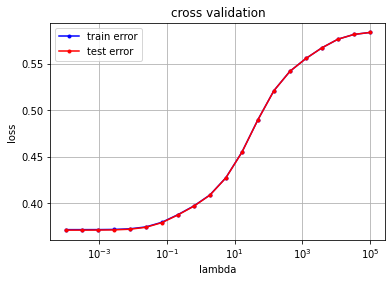

In [8]:
best_lambda,best_error = cross_validation_demo_r(y[:100000], tx_train[:100000,:], 4, np.logspace(-4,5,20), 5)

TEST MODEL ACCURACY

In [9]:
test_accuracy = np.zeros(10)
train_accuracy = np.zeros(10)
for n in range(10):
    x_train,x_test,y_train,y_test = divide_dataset(tx_train,y,0.7)

    x_train_temp = x_train[:,1:-4]
    x_test_temp = x_test[:, 1:-4]

    phi = build_poly(x_train_temp, degree=5)
    phi2 = build_poly(x_test_temp, degree=5)

    #aggiungo offset di nuovo 

    _, phi = build_model_data(y_train, phi)
    _, phi2 = build_model_data(y_test, phi2)
    
    #aggiungo categoriche
    phi=np.hstack((phi,x_train[:,-4:]))
    phi2=np.hstack((phi2,x_test[:,-4:]))

    w_opt,_ = ridge_regression(y_train,phi,best_lambda)
    pred_train = phi.dot(w_opt)
    pred_train[pred_train>=0.5]=1
    pred_train[pred_train<0.5]=0
    pred_test = phi2.dot(w_opt)
    pred_test[pred_test>=0.5]=1
    pred_test[pred_test<0.5]=0
    train_accuracy[n] = np.sum(pred_train == y_train)/len(y_train)
    test_accuracy[n] = np.sum(pred_test == y_test)/len(y_test)

print('Average train accuracy: {}'.format(np.mean(train_accuracy)))
print('std train accuracy: {}'.format(np.std(train_accuracy)))
print('Average test accuracy: {}'.format(np.mean(test_accuracy)))
print('std train accuracy: {}'.format(np.std(test_accuracy)))

    

Average train accuracy: 0.8165554285714286
std train accuracy: 0.000532286864503004
Average test accuracy: 0.8166693333333332
std train accuracy: 0.0012422459946045657


GETTING CSV